In [1]:
import numpy as np
import pymt.models

waves = pymt.models.Waves()
args = waves.setup()
waves.initialize(*args)

cem = pymt.models.Cem()
args = cem.setup(number_of_rows=100, number_of_cols=200, grid_spacing=200.)
cem.initialize(*args)

hydrotrend = pymt.models.Hydrotrend()
args = hydrotrend.setup(run_duration=100)
hydrotrend.initialize(*args)

qs = np.zeros(cem.grid_shape(2), dtype=float)
qs[0, 100] = 750
qs_save = []

for time in range(3000):
    waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_asymmetry_parameter', .3)
    waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_highness_parameter', .7)

    waves.update()
    angle = waves.get_value("sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity")
    
    cem.set_value("sea_surface_water_wave__height", 2.0)
    cem.set_value("sea_surface_water_wave__period", 7.0)
    cem.set_value(
        "sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity",
        angle,
    )

    hydrotrend.update()
    qs[0, 100] = hydrotrend.get_value("channel_exit_water_sediment~suspended__mass_flow_rate")
    
    qs_save.append(qs[0, 100])
    
    cem.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs)
    cem.update_until(time)
    
    if time % 100 == 0:
        print("time = {0}".format(time))

➡ models: Avulsion, Plume, Sedflux3D, Subside, FrostNumber, Ku, Hydrotrend, Cem, Waves, ExponentialWeatherer, Flexure, FlowAccumulator, FlowDirectorD8, FlowDirectorDINF, FlowDirectorSteepest, LinearDiffuser, OverlandFlow, SoilMoisture, StreamPowerEroder, TransportLengthHillslopeDiffuser, Vegetation


time = 0
time = 100
time = 200
time = 300
time = 400
time = 500
time = 600
time = 700
time = 800
time = 900
time = 1000
time = 1100
time = 1200
time = 1300
time = 1400


In [2]:
def plot_coast(spacing, z):
    import matplotlib.pyplot as plt

    xmin, xmax = 0., z.shape[1] * spacing[0] * 1e-3
    ymin, ymax = 0., z.shape[0] * spacing[1] * 1e-3

    plt.imshow(z, extent=[xmin, xmax, ymin, ymax], origin="lower", cmap="ocean")
    plt.colorbar().ax.set_ylabel("Water Depth (m)")
    plt.xlabel("Along shore (km)")
    plt.ylabel("Cross shore (km)")

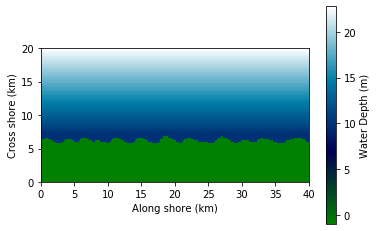

In [4]:
z = cem.get_value('sea_water__depth').reshape(cem.grid_shape(2))
plot_coast(cem.grid_spacing(2), z)

In [5]:
qs_save

[0.002789636475236596,
 0.0082716148760771085,
 2061.5453030721555,
 69.692963494932513,
 5.5679804817186733,
 9.8369364792671448,
 24.028156721061226,
 3.1800271236105528,
 1.0028329687279884,
 2.1718279461684493,
 6.5900504293048243,
 0.97279630589925159,
 0.68295731117177105,
 1.5856475832823027,
 0.59192739542400297,
 1.2027394830568687,
 0.14013028154094181,
 0.28735249440422383,
 2.1090236516467895,
 0.15878462552569153,
 0.089549159499981934,
 0.16030114941476892,
 0.21543932335009572,
 0.24586112155091458,
 0.18919824660376355,
 0.16691717959868707,
 0.08182568847750378,
 0.23603450288690656,
 0.37395845427459679,
 0.071190935246522327,
 0.11201040483060556,
 736.34254093119796,
 239.27457907612407,
 6.3969351234890706,
 3.4706340328160286,
 9.0396204806585558,
 18.851034313625942,
 3.3426192641265944,
 4.7108833280407216,
 7.9035238358971442,
 5.5109832665122394,
 0.30710518336535059,
 0.61872686874973626,
 0.45878636691661756,
 0.1432000278271508,
 0.38483134013132347,
 0.432

In [6]:
hydrotrend.var_units("channel_exit_water_sediment~suspended__mass_flow_rate")

'kg / s'